In [135]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.ticker as mtick
import requests as req
from bs4 import BeautifulSoup
import json, requests

**Tarefa 1: Identificação de Dados**

Fonte de dados utilizada Para esta análise:

[Portal Brasileiro de Dados Abertos do Banco Central](https://www3.bcb.gov.br/sgspub/localizarseries/localizarSeries.do?method=prepararTelaLocalizarSeries)

[Sobre o Portal do Banco Central](https://dadosabertos.bcb.gov.br/pages/sobre-o-portal)

Séries de dados utilizadas: 
* Índice nacional de preços ao consumidor-amplo (IPCA) = (433) - Dados IBGE
* Índice volume de vendas no varejo - Hipermercados e supermercados - Brasil = (1561) - Dados IBGE
* Salário Mínimo = (1619) - Dados MTb


* Cesta Básica - Aracaju = (7479) - Dados Dieese
* Cesta Básica - Belem = (7480) - Dados Dieese
* Cesta Básica - Belo Horizonte = (7481) - Dados Dieese
* Cesta Básica - Brasilia = (7482) - Dados Dieese
* Cesta Básica - Curitiba = (7483) - Dados Dieese
* Cesta Básica - Florianopolis = (7484) - Dados Dieese
* Cesta Básica - Fortaleza = (7485) - Dados Dieese
* Cesta Básica - Goiania = (7486) - Dados Dieese
* Cesta Básica - Joao Pessoa = (7487) - Dados Dieese
* Cesta Básica - Natal = (7488) - Dados Dieese
* Cesta Básica - Porto Alegre = (7489) - Dados Dieese
* Cesta Básica - Recife = (7490) - Dados Dieese
* Cesta Básica - Rio_de Janeiro = (7491) - Dados Dieese
* Cesta Básica - Salvador = (7492) - Dados Dieese
* Cesta Básica - Sao Paulo = (7493) - Dados Dieese
* Cesta Básica - Vitoria = (7494) - Dados Dieese

Premissas:
* **Índice de preços no consumidor IPCA** é usado para observar tendências de inflação. É calculado com base no preço médio necessário para comprar um conjunto de bens de consumo e serviços num país, comparando com períodos anteriores.

* **A Pesquisa Nacional da Cesta Básica de Alimentos (PNCBA)** é um levantamento contínuo dos preços de um conjunto de produtos alimentícios considerados essenciais. A PNCBA foi implantada em São Paulo em 1959, a partir dos preços coletados para o cálculo do Índice de Custo de Vida (ICV) e, ao longo dos anos, foi ampliada para outras capitais. Hoje, é realizada em 17 Unidades da Federação e permite a comparação de custos dos principais alimentos básicos consumidos pelos brasileiros.

* Os itens básicos pesquisados foram definidos pelo Decreto Lei nº 399, de 30 de abril de 1938, que regulamentou o salário mínimo no Brasil e está vigente até os dias atuais. O Decreto determinou que a cesta de alimentos fosse composta por 13 produtos alimentícios em quantidades suficientes para garantir, durante um mês, o sustento e bem-estar de um trabalhador em idade adulta. Os bens e quantidades estipuladas foram diferenciados por região, de acordo com os hábitos alimentares locais.

* O banco de dados da PNCBA apresenta os preços médios, o valor do conjunto dos produtos e a jornada de trabalho que um trabalhador precisa cumprir, em todas as capitais, para adquirir a cesta. Os dados permitem a todos os segmentos da sociedade conhecer, estudar e refletir sobre o valor da alimentação básica no país.


In [136]:
# Chamando a API
def consulta_bc(codigo_bcb):
  url = 'http://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/dados?formato=json'.format(codigo_bcb)
  raw_json = requests.get(url)
  # Realizando a conversão do json para um formato acessível ao python
  df_json = json.loads(raw_json.text)
  # Transformando os dados em um DataFrame do Pandas
  df = pd.DataFrame(df_json)
  df['data'] = pd.to_datetime(df['data'], dayfirst=True)
  df.set_index('data', inplace=True)
  df.index = pd.to_datetime(df.index, format='%d%m%Y')
  df = df.replace(',','.', regex=True).astype(float)
  return df

In [137]:
def grafico_periodo_gov_sal(df, inicio, fim):
  periodo = df[(df.index >= inicio) & (df.index <= fim)]  
  periodo['salario'].plot()

def grafico_periodo_gov_cesta(df, inicio, fim):
  periodo = df[(df.index >= inicio) & (df.index <= fim)]  
  periodo['cesta_basica'].plot()

def grafico_periodo_gov_repr(df, inicio, fim):
  periodo = df[(df.index >= inicio) & (df.index <= fim)]  
  periodo['representatividade'].plot()
  
def grafico_periodo_gov_ind(df, inicio, fim):
  periodo = df[(df.index >= inicio) & (df.index <= fim)]  
  periodo['indicador'].plot()

In [138]:
data_inicio = '2000-01-01'
data_inicio2 = '2012-01-01'
data_inicio3 = '2021-08-01'

In [139]:
# Definição dos códigos BCB e Consultas
ipca = consulta_bc(433)
# Salário Minimo do País
salario_min = consulta_bc(1619)
vol_vendas_mercados= consulta_bc(1561)
# Valor dos alimentos em 16 capitais do país, desde 1998.
cesta_basica_Aracaju = consulta_bc(7479)
cesta_basica_Belem = consulta_bc(7480)
cesta_basica_Belo_Horizonte = consulta_bc(7481)
cesta_basica_Brasilia = consulta_bc(7482)
cesta_basica_Curitiba = consulta_bc(7483)
cesta_basica_Florianopolis = consulta_bc(7484)
cesta_basica_Fortaleza = consulta_bc(7485)
cesta_basica_Goiania = consulta_bc(7486)
cesta_basica_Joao_Pessoa = consulta_bc(7487)
cesta_basica_Natal = consulta_bc(7488)
cesta_basica_Porto_Alegre = consulta_bc(7489)
cesta_basica_Recife = consulta_bc(7490)
cesta_basica_Rio_de_Janeiro = consulta_bc(7491)
cesta_basica_Salvador = consulta_bc(7492)
cesta_basica_Sao_Paulo = consulta_bc(7493)
cesta_basica_Vitoria = consulta_bc(7494)

In [140]:
# Concatenar todos os datasets consultados via API
df_concat = pd.concat((cesta_basica_Aracaju, cesta_basica_Belem, cesta_basica_Belo_Horizonte, cesta_basica_Brasilia, cesta_basica_Curitiba, cesta_basica_Florianopolis, 
cesta_basica_Fortaleza, cesta_basica_Goiania, cesta_basica_Joao_Pessoa, cesta_basica_Natal, cesta_basica_Porto_Alegre, cesta_basica_Recife, cesta_basica_Rio_de_Janeiro,
cesta_basica_Salvador, cesta_basica_Sao_Paulo, cesta_basica_Vitoria))
# Classificação concatenando todos os datasets consultados via API em Grupos Regionais
df_conc_centro_oeste = pd.concat((cesta_basica_Brasilia,cesta_basica_Goiania))
df_conc_nordeste =  pd.concat((cesta_basica_Aracaju, cesta_basica_Fortaleza, cesta_basica_Joao_Pessoa, cesta_basica_Natal, cesta_basica_Recife, cesta_basica_Salvador))
df_conc_norte = (cesta_basica_Belem)
df_conc_sudeste = pd.concat((cesta_basica_Belo_Horizonte, cesta_basica_Rio_de_Janeiro, cesta_basica_Sao_Paulo, cesta_basica_Vitoria))
df_conc_sul = pd.concat((cesta_basica_Curitiba, cesta_basica_Florianopolis, cesta_basica_Porto_Alegre))

In [141]:
# Média dos datasets dos estados considerados
by_row_index = df_concat.groupby(df_concat.index)
df_media = by_row_index.mean()
# Centro-Oeste
by_row_index = df_conc_centro_oeste.groupby(df_conc_centro_oeste.index)
df_centro_oeste = by_row_index.mean()
# Nordeste
by_row_index = df_conc_nordeste.groupby(df_conc_nordeste.index)
df_nordeste = by_row_index.mean()
# Norte
by_row_index = df_conc_norte.groupby(df_conc_norte.index)
df_norte = by_row_index.mean()
# Sudeste
by_row_index = df_conc_sudeste.groupby(df_conc_sudeste.index)
df_sudeste = by_row_index.mean()
#Sul
by_row_index = df_conc_sul.groupby(df_conc_sul.index)
df_sul = by_row_index.mean()

In [142]:
df_media

,valor
data,
1998-01-01,85.969375
1998-02-01,85.792500
1998-03-01,89.405625
1998-04-01,93.811875
1998-05-01,97.791875
...,...
2022-06-01,666.931875
2022-07-01,661.855625
2022-08-01,653.665625


In [143]:
# Calculo para tomar a proporção da comparação para cada periodo.
representatividade = ((df_media[df_media.index >= data_inicio] / salario_min[salario_min.index >= data_inicio]) * 100)

In [144]:
evol_sal_min_gov = salario_min
evol_sal_min_gov.columns = ['salario']
evol_sal_min_gov.index = pd.to_datetime(evol_sal_min_gov.index, format='%d%m%Y')
evol_sal_min_gov = evol_sal_min_gov.replace(',','.', regex=True).astype(float)

evol_cesta_basica_gov = df_media
evol_cesta_basica_gov.columns = ['cesta_basica']
evol_cesta_basica_gov.index = pd.to_datetime(evol_cesta_basica_gov.index, format='%d%m%Y')
evol_cesta_basica_gov = evol_cesta_basica_gov.replace(',','.', regex=True).astype(float)

represent_gov = representatividade
represent_gov.columns = ['representatividade']
represent_gov.index = pd.to_datetime(represent_gov.index, format='%d%m%Y')
represent_gov = represent_gov.replace(',','.', regex=True).astype(float)

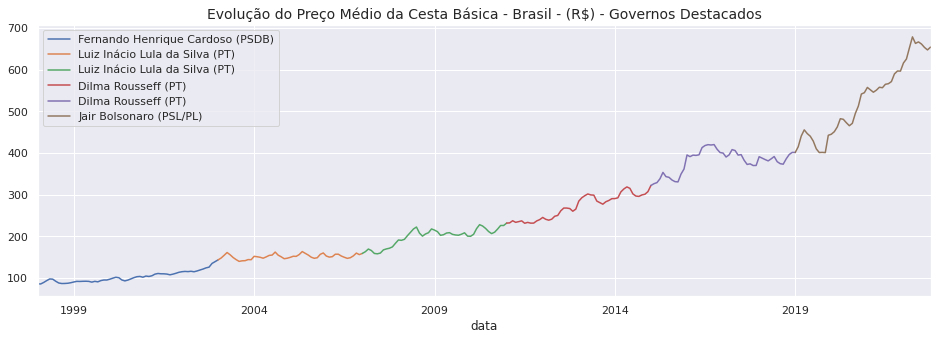

In [145]:
plt.rcParams['figure.figsize'] = (16, 5)
plt.title('Evolução do Preço Médio da Cesta Básica - Brasil - (R$) - Governos Destacados', fontsize=14)
grafico_periodo_gov_cesta(evol_cesta_basica_gov, '1998-01-01', '2003-01-01')
grafico_periodo_gov_cesta(evol_cesta_basica_gov, '2003-01-01', '2007-01-01')
grafico_periodo_gov_cesta(evol_cesta_basica_gov, '2007-01-01', '2011-01-01')
grafico_periodo_gov_cesta(evol_cesta_basica_gov, '2011-01-01', '2015-01-01')
grafico_periodo_gov_cesta(evol_cesta_basica_gov, '2015-01-01', '2019-01-01')
grafico_periodo_gov_cesta(evol_cesta_basica_gov, '2019-01-01', '2023-01-01')
#Legenda dos períodos
plt.legend(['Fernando Henrique Cardoso (PSDB)','Luiz Inácio Lula da Silva (PT)','Luiz Inácio Lula da Silva (PT)','Dilma Rousseff (PT)','Dilma Rousseff (PT)','Jair Bolsonaro (PSL/PL)'])
plt.show()

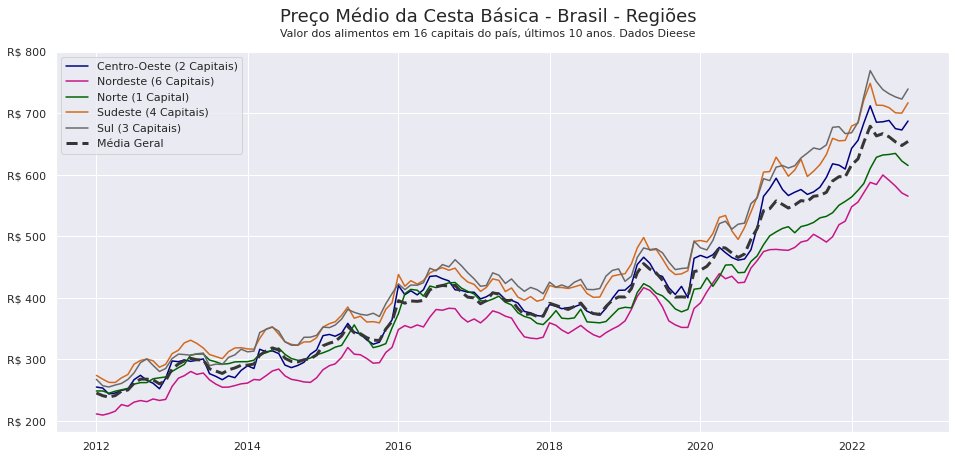

In [146]:
matplotlib.rcParams['figure.figsize'] = (16,7)
fig, ax1 = plt.subplots()
plt.text(x=0.5, y=0.94, s="Preço Médio da Cesta Básica - Brasil - Regiões", fontsize=18, ha="center", transform=fig.transFigure)
plt.text(x=0.5, y=0.91, s= "Valor dos alimentos em 16 capitais do país, últimos 10 anos. Dados Dieese", fontsize=11, ha="center", transform=fig.transFigure)

ax1.plot(df_centro_oeste[df_centro_oeste.index >= data_inicio2], color='#000080')
ax1.plot(df_nordeste[df_nordeste.index >= data_inicio2], color='#C71585')
ax1.plot(df_norte[df_norte.index >= data_inicio2], color='#006400')
ax1.plot(df_sudeste[df_sudeste.index >= data_inicio2], color='#D2691E')
ax1.plot(df_sul[df_sul.index >= data_inicio2], color='#696969')
ax1.plot(df_media[df_media.index >= data_inicio2], color='#363636', linewidth=3.0, linestyle='--')
ax1.legend(['Centro-Oeste (2 Capitais)', 'Nordeste (6 Capitais)', 'Norte (1 Capital)', 'Sudeste (4 Capitais)', 'Sul (3 Capitais)', 'Média Geral'])

fmt = 'R$ {x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax1.yaxis.set_major_formatter(tick) 
plt.ylim(top=800)
plt.show()

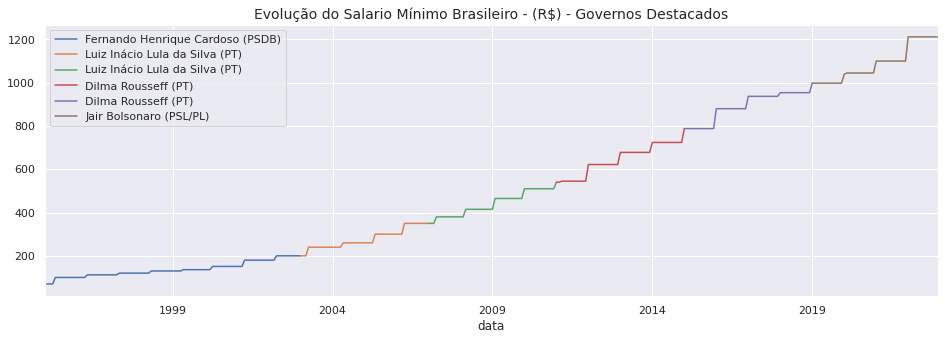

In [147]:
plt.rcParams['figure.figsize'] = (16, 5)
plt.title('Evolução do Salario Mínimo Brasileiro - (R$) - Governos Destacados', fontsize=14)
grafico_periodo_gov_sal(evol_sal_min_gov, '1995-01-01', '2003-01-01')
grafico_periodo_gov_sal(evol_sal_min_gov, '2003-01-01', '2007-01-01')
grafico_periodo_gov_sal(evol_sal_min_gov, '2007-01-01', '2011-01-01')
grafico_periodo_gov_sal(evol_sal_min_gov, '2011-01-01', '2015-01-01')
grafico_periodo_gov_sal(evol_sal_min_gov, '2015-01-01', '2019-01-01')
grafico_periodo_gov_sal(evol_sal_min_gov, '2019-01-01', '2023-01-01')
#Legenda dos períodos
plt.legend(['Fernando Henrique Cardoso (PSDB)','Luiz Inácio Lula da Silva (PT)','Luiz Inácio Lula da Silva (PT)','Dilma Rousseff (PT)','Dilma Rousseff (PT)','Jair Bolsonaro (PSL/PL)'])
plt.show()

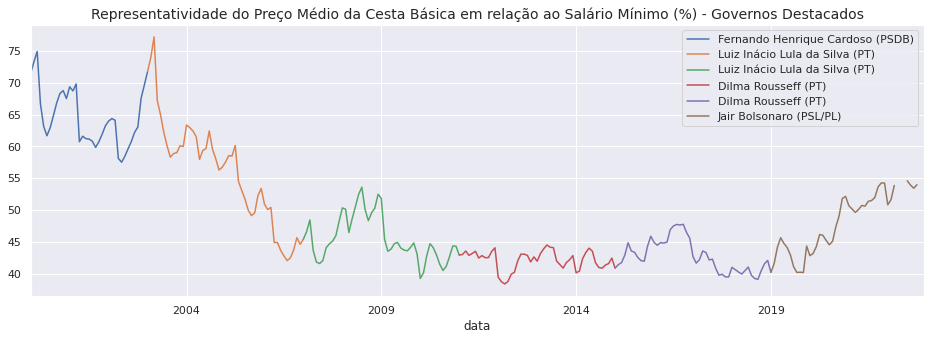

In [148]:
plt.rcParams['figure.figsize'] = (16, 5)
plt.title('Representatividade do Preço Médio da Cesta Básica em relação ao Salário Mínimo (%) - Governos Destacados', fontsize=14)
grafico_periodo_gov_repr(represent_gov, '1998-01-01', '2003-01-01')
grafico_periodo_gov_repr(represent_gov, '2003-01-01', '2007-01-01')
grafico_periodo_gov_repr(represent_gov, '2007-01-01', '2011-01-01')
grafico_periodo_gov_repr(represent_gov, '2011-01-01', '2015-01-01')
grafico_periodo_gov_repr(represent_gov, '2015-01-01', '2019-01-01')
grafico_periodo_gov_repr(represent_gov, '2019-01-01', '2023-01-01')
#Legenda dos períodos
plt.legend(['Fernando Henrique Cardoso (PSDB)','Luiz Inácio Lula da Silva (PT)','Luiz Inácio Lula da Silva (PT)','Dilma Rousseff (PT)','Dilma Rousseff (PT)','Jair Bolsonaro (PSL/PL)'])
plt.show()

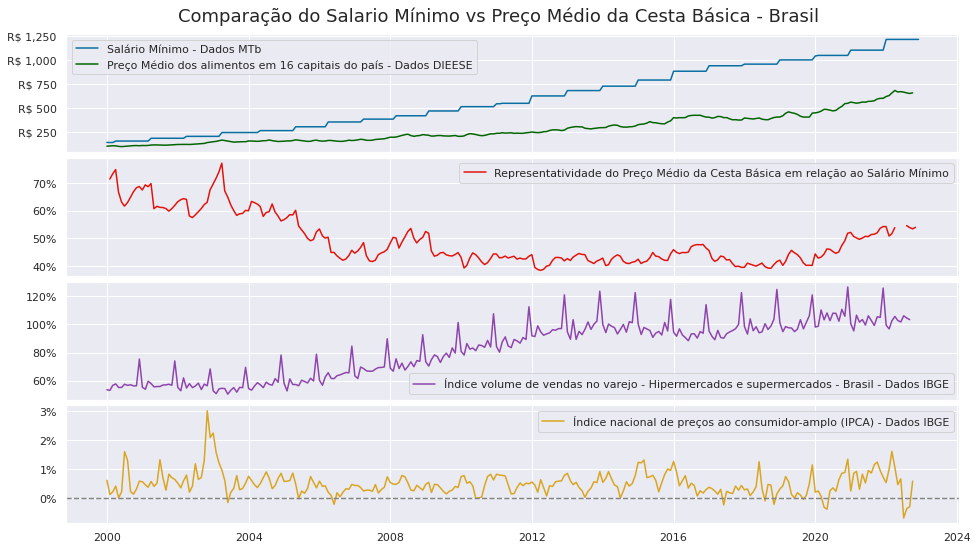

In [149]:
matplotlib.rcParams['figure.figsize'] = (16,9)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, sharex=True)
plt.text(x=0.5, y=0.90, s="Comparação do Salario Mínimo vs Preço Médio da Cesta Básica - Brasil", fontsize=18, ha="center", transform=fig.transFigure)
 # Plotagem de comparação com o respectivo salário mínimo de cada ano.
ax1.plot(salario_min[salario_min.index >= data_inicio], color='#076FA1')
ax1.plot(df_media[df_media.index >= data_inicio], color='#006400')
ax1.legend(['Salário Mínimo - Dados MTb', 'Preço Médio dos alimentos em 16 capitais do país - Dados DIEESE'])
fmt = 'R$ {x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)

ax1.yaxis.set_major_formatter(tick) 
ax2.plot(representatividade[representatividade.index >= data_inicio].resample("1m", label="right").last(), color='#E3120B')
ax2.legend(['Representatividade do Preço Médio da Cesta Básica em relação ao Salário Mínimo'])
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))

ax3.plot(vol_vendas_mercados[vol_vendas_mercados.index >= data_inicio], color='#8E44AD')
ax3.legend(['Índice volume de vendas no varejo - Hipermercados e supermercados - Brasil - Dados IBGE'])
ax3.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))

ax4.plot(ipca[ipca.index >= data_inicio], color='#DAA520')
ax4.legend(['Índice nacional de preços ao consumidor-amplo (IPCA) - Dados IBGE'])
ax4.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))
#Imprimindo uma linha em y=0.0
plt.axhline(y=0.0, color='grey', linewidth=1.4, linestyle='--')
plt.subplots_adjust(hspace=.05)
plt.show()

#Passo 1: Extraindo HTML de uma página da web.

In [150]:
def month_converter(date:str) -> str:
    '''Converts month in portuguese language to the respective number.'''
    months = {
        'janeiro':1,
        'fevereiro':2, 
        'março':3,
        'abril':4,
        'maio':5,
        'junho':6,
        'julho':7,
        'agosto':8,
        'setembro':9,
        'outubro':10,
        'novembro':11,
        'dezembro':12
    }
    return months[date.lower()]

def money_treatment(money:str) -> float:
    '''Formats money in reais to a float.'''
    return float(money.replace("R$",'').replace('.','')
                 .replace(',','.').replace('\n',''))

#Passo 2: Direcionando elementos de interesse dentro do HTML.

In [151]:
webpage = "https://www.dieese.org.br/analisecestabasica/salarioMinimo.html"
font_code = req.get(webpage).text
soup = BeautifulSoup(font_code, 'html.parser')

In [152]:
header = [column_name.text for column_name in soup.thead.tr.find_all('th')]

In [153]:
dados = []
for rows in soup.tbody.find_all('tr'):
    if len(array:=rows.find_all('td')) > 1:
        dummy_array = [dados.text for dados in array]
        dummy_array[0] = '-'.join([ano,str(month_converter(dummy_array[0]))])
        dummy_array[1] = money_treatment(dummy_array[1])
        dummy_array[2] = money_treatment(dummy_array[2])
        dados.append(dummy_array)
    else:
        ano = array[0].text

#Passo 3: Armazenar os dados dentro de um DataFrame.

In [154]:
df_sal_min_dieese = pd.DataFrame(dados, columns=header)

In [155]:
df_sal_min_dieese.set_index(pd.to_datetime(df_sal_min_dieese['Período']), inplace=True)

In [156]:
df_sal_min_dieese.drop('Período',inplace=True,axis=1)

In [157]:
df_sal_min_dieese['indicador'] = df_sal_min_dieese['Salário mínimo necessário']/df_sal_min_dieese['Salário mínimo nominal']

In [158]:
df_sal_min_dieese.round(2)

,Salário mínimo nominal,Salário mínimo necessário,indicador
Período,,,
2022-10-01,1212.00,6458.86,5.33
2022-09-01,1212.00,6306.97,5.20
2022-08-01,1212.00,6298.91,5.20
2022-07-01,1212.00,6388.55,5.27
2022-06-01,1212.00,6527.67,5.39
...,...,...,...
1994-11-01,70.00,744.25,10.63
1994-10-01,70.00,740.83,10.58
1994-09-01,70.00,695.64,9.94


#Passo 5: Analisando os dados e criando visualizações.

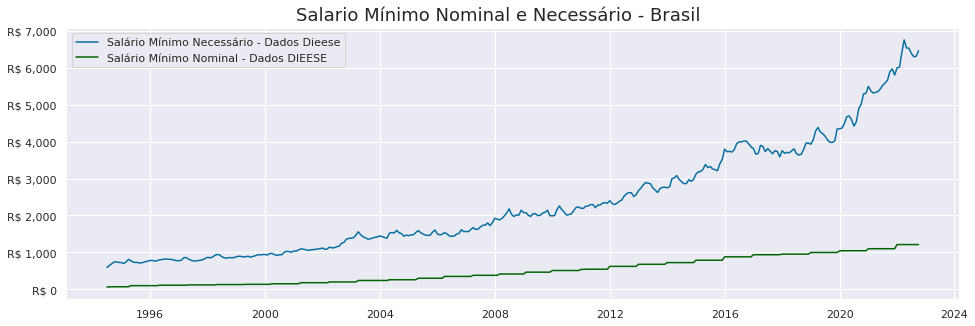

In [159]:
matplotlib.rcParams['figure.figsize'] = (16,5)
fig, (ax1) = plt.subplots(1, sharex=True)
plt.text(x=0.5, y=0.90, s="Salario Mínimo Nominal e Necessário - Brasil", fontsize=18, ha="center", transform=fig.transFigure)

ax1.plot(df_sal_min_dieese['Salário mínimo necessário'], color='#076FA1')
ax1.plot(df_sal_min_dieese['Salário mínimo nominal'], color='#006400')
ax1.legend(['Salário Mínimo Necessário - Dados Dieese', 'Salário Mínimo Nominal - Dados DIEESE'])
fmt = 'R$ {x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax1.yaxis.set_major_formatter(tick) 
plt.show()

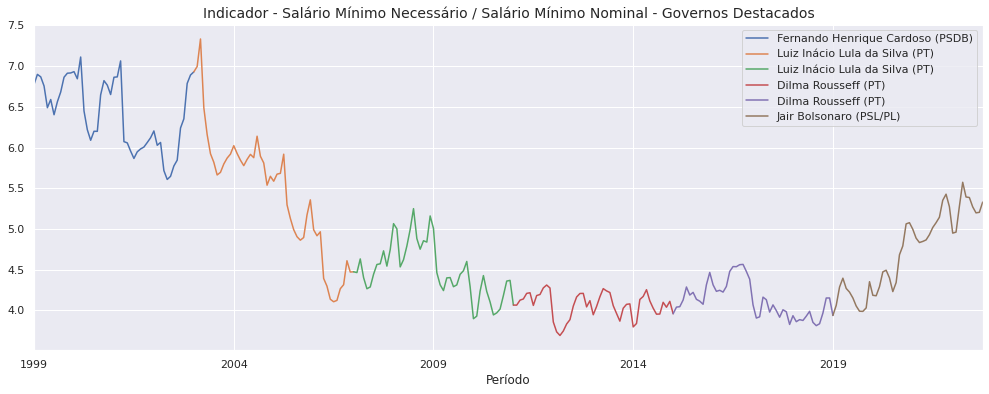

In [160]:
plt.rcParams['figure.figsize'] = (17, 6)
plt.title('Indicador - Salário Mínimo Necessário / Salário Mínimo Nominal - Governos Destacados', fontsize=14)
grafico_periodo_gov_ind(df_sal_min_dieese, '1999-01-01', '2003-01-01')
grafico_periodo_gov_ind(df_sal_min_dieese, '2003-01-01', '2007-01-01')
grafico_periodo_gov_ind(df_sal_min_dieese, '2007-01-01', '2011-01-01')
grafico_periodo_gov_ind(df_sal_min_dieese, '2011-01-01', '2015-01-01')
grafico_periodo_gov_ind(df_sal_min_dieese, '2015-01-01', '2019-01-01')
grafico_periodo_gov_ind(df_sal_min_dieese, '2019-01-01', '2023-01-01')
#Legenda dos períodos
plt.legend(['Fernando Henrique Cardoso (PSDB)','Luiz Inácio Lula da Silva (PT)','Luiz Inácio Lula da Silva (PT)','Dilma Rousseff (PT)','Dilma Rousseff (PT)','Jair Bolsonaro (PSL/PL)'])
plt.show()

In [161]:
inicio = '1994-07-01'

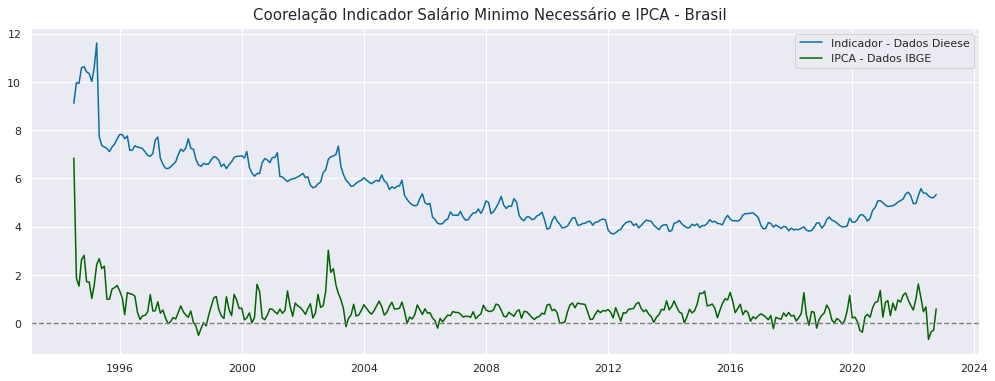

In [162]:
matplotlib.rcParams['figure.figsize'] = (17,6)
fig, (ax1) = plt.subplots(1, sharex=True)
plt.text(x=0.5, y=0.90, s="Coorelação Indicador Salário Minimo Necessário e IPCA - Brasil", fontsize=15, ha="center", transform=fig.transFigure)

ax1.plot(df_sal_min_dieese['indicador'], color='#076FA1')
ax1.plot(ipca[ipca.index >= inicio], color='#006400')
ax1.legend(['Indicador - Dados Dieese', 'IPCA - Dados IBGE'])

fmt = '{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax1.yaxis.set_major_formatter(tick) 
#Imprimindo uma linha em y=0.0
plt.axhline(y=0.0, color='grey', linewidth=1.4, linestyle='--')
plt.show()